# Model Comparison with AIC and BIC

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
np.random.seed(1)
p = 2
n = 500
x = np.linspace(-3, 3, 500)
beta_true = np.random.randn(p+1)
X = np.array([[x_i**(p_j) for x_i in x] for p_j in range(p+1)]).T
noise = np.random.randn(len(x)) * 3
y_obs = X @ beta_true.T + noise.T
y_true = X @ beta_true

In [88]:
def ols(x, y, p=1):
    """Calculates the ordinary least-squares regression technique
    results given the data for polynomial degree p.
    """
    X = np.array([[x_i**(p_j) for x_i in x] for p_j in range(p+1)]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    y_hat = X @ beta
    n = len(y)
    r2 = (y - y_hat).T @ (y - y_hat)
    log_like = -n/2 * np.log(2*np.pi) - 1/2 * r2
    aic = 2 * len(beta) - 2 * log_like
    return beta, y_hat, aic

In [89]:
y_hats, aics = {}, {}
for p in range(1, 10):
    beta, y_hat, aic = ols(x, y_obs, p)
    y_hats[p] = y_hat
    aics[p] = aic

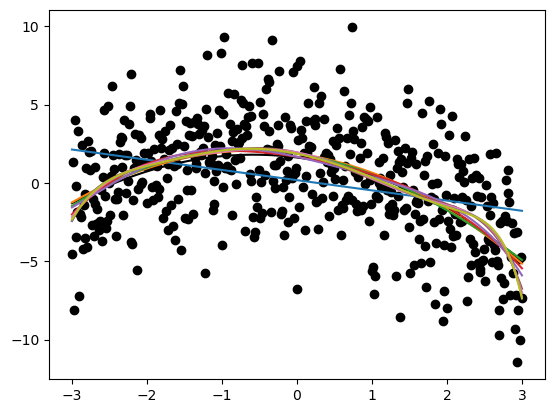

In [90]:
plt.scatter(x, y_obs, color='k')
plt.plot(x, y_true, color='k')
for p, y_hat in y_hats.items():
    plt.plot(x, y_hat)

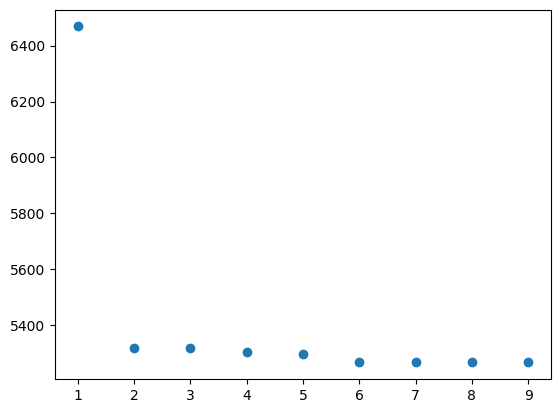

In [91]:
plt.scatter(*zip(*aics.items()))

In [92]:
print(aics.items())

dict_items([(1, 6468.377793549678), (2, 5319.827994998928), (3, 5317.79746693601), (4, 5303.210396770988), (5, 5295.464411817902), (6, 5267.2142077415065), (7, 5267.083731341476), (8, 5266.7095045223705), (9, 5268.234379155909)])
